In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Muony - proč je můžeme detekovat na povrchu Země?

Muon je nestabilní subaotmání částice s poločasem rozpadu $\tau = 2.2$ $\mu \text{s}$. Jedním ze zdrojů muonů je kosmické záření které je vytváří ve vyšších vrtvách armosféry. Po svém vzniku ve vyšší atmosféře má rychlost která může dosahovat až 99,97% rychlosti světla ($v_\mu = 0.9997 c$). Pokud by muony touto rychlostí letěli směrem k povrchu Země, dorazila by alespoň polovina k povrchu Země podle klasické fyziky? A co nám k tomu řekne speciální teorie relativity?

Pokud mouny mají rychlost $v = 0.9997 c$ (kde $c = 299 792 458$ m/s) z výšky $v = 10$ km a poločasem rozpadu $\tau = 2.2$ $\mu\text{s}$ kam dorazí polovina do jaké vzdálenosti dorazí alespoň polovina z muonů? To nám řekne vzoreček z klasické mechaniky

\begin{equation*}
    d = 1/2 \cdot \tau \cdot v = 1/2 \cdot \tau \cdot 0.9997 \cdot c
\end{equation*}

In [5]:
# Proměnné:
c = 299792458
v = 0.9997*c
tau = 2.2e-6

d = 1/2*tau*v       # Vzdálenost kterou urazí polovina muonů (tzv. polodráha - není to zavedený pojem, ale pojem, který nám má usnadnit práci)

print(f"Vzdálenost kterou urazí polovina muonů (říkejme jí \"polodráha\" rozpadu) je {d:,.2f} m")

pocet_polodrah = 10000/d

print(f"Munony urazily {pocet_polodrah:,.2f} než dorazily k povrchu Země. Tím pádem tento let \"přežilo\" jen {100*0.5**pocet_polodrah:,.9f} %")

Vzdálenost kterou urazí polovina muonů (říkejme jí "polodráha" rozpadu) je 329.67 m
Munony urazily 30.33 než dorazily k povrchu Země. Tím pádem tento let "přežilo" jen 0.000000074 %


Vypočtli jsme "polodráhu" rozpadu (dráhu, kterou muony s rychlostí $v$ urazí, a po které se jich polovina rozpadne). Celková dráha, kterou je nutno překonat je $h = 10$ km. To znamená že muony urazí $\frac{10000}{329.67}$ polodráh rozpadu a k Zemi jich dorazí jen malý zlomek. To se ale ve skutečnosti neděje a k povrvhu Země by jich dorazilo mnohem více. Proč? Odpověď na tuto otázku nám poskytnou důsledky speciální teorie relativity - dilatace času a kontrakce délek. 

Dilatace času a kontrakce délek jsou jevy, které se projevují u objektů pohybujících vysokou rychlostí (řádově srovnatelnou s rychlostí světla). Zjednodušeně můžeme dilataci času popsat takto - hodinky které by muony měli u sebe budou tikat pomaleji než ty, které budeme mít my na Zemi. A to přesně $\gamma$-krát. 

\begin{equation*}
    \gamma = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}}
\end{equation*}

Pro nás to znamená to, že se poločas rozpadu $\tau$ pro pozorovatele na Zemi prodlouží podle vzorce pro dilataci času

\begin{equation*}
    \tau' = \gamma \tau = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}} \cdot \tau,
\end{equation*}
kde $\tau'$ je poločas rozpadu muonů pro pozorovatele spojené se Zemí. 


Kontrakce delek se v tomto případě naopak projeví jako zkrácení vzdálenosti kterou muony urazí. Vzorec pro kontrakci délek je

\begin{equation*}
    l' = \frac{l}{\gamma} = \sqrt{1-\frac{v^2}{c^2}} \cdot l,
\end{equation*}
kde $l$ je výška ve které se muony vytvořili pro pozorovatele na Zemi a $l'$ je výška jak by ji změřili muony samotné.

Jak kontrakce délek, tak i dilatace času jsou dva různé pohledy na tento jev, které jsou ekvivalentí. A to si nyní ukážeme.

In [6]:
#definujeme si funkci gamma

def gamma(v):
    return(np.sqrt(1/(1-(v/c)**2)))

# Člen $\gamma$

Člen gamma se objevuje v jak vzorci pro časovou dilataci, tak pro kontrakci délek a záleží jen na rychlosti. Zkusime si jej zobrazit v grafu!

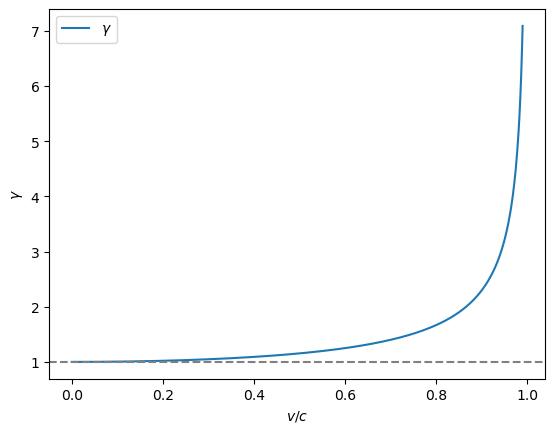

In [14]:
v = np.linspace(0,0.99,1000)                            # Rozsah rychlostí v grafui (v násobích rychlosti světla)

plt.plot(v,gamma(v*c), label = r"$\gamma$")
plt.axhline(1, color = "gray", linestyle = "--")

plt.xlabel("$v/c$")
plt.ylabel(r"$\gamma$")

plt.legend()

Jak můžeme vidět z grafu, tak se kontrakce délek nebo dilatace času výrazně projeví jen u objektů s rychlostí $v > 0.1 \cdot c$ (pro objekty s rychlostí $v = 0.1 \cdot c$ platí $\gamma \approx 1.005$). Proto tyto efekty v každoděnním životě nepozorujeme. Pojdmě nyní spočítat poločas rozpadu našeho muonu pro pozorovatele na Zemi. 

## Dilatace času

In [8]:
# Definujeme si funkci pro výpočet dilatace času

def dilatace_casu(u,t):
    return(gamma(u)*t)

In [9]:
v = 0.9997*c
tau_zeme = dilatace_casu(v,tau)

print(f"Poločas rozpadu pro pozorovatele na Zemi je tau' = {tau_zeme:,.7f} s = {1e6*tau_zeme:,.2f} mus")

Poločas rozpadu pro pozorovatele na Zemi je tau' = 0.0000898 s = 89.82 mus


Poločas rozpadu našich muonů je výrazně vyšší pro pozorovatele na Zemi - $\tau'$. Podívejme se jakou vzdálenost urazí behem doby $\tau'$.

In [10]:
d = 1/2*tau_zeme*v

print(f"Polodaha rozpadu po započtení dilatace času je {d:,.2f} m, což znamená, že víc jak polovina muonů dorazí až k povrchu Země!")

Polodaha rozpadu po započtení dilatace času je 13,459.84 m, což znamená, že víc jak polovina muonů dorazí až k povrchu Země!


## Kontrakce délek

In [11]:
# Definujeme funkci pro kontrakci délek

def kontrakce_delek(u,l):
    return(l/gamma(u))

In [15]:
v = 0.9997*c    # Rychlost muonu
l = 10000       # Vyska, ve ktere se tvori muony 
l_muon = kontrakce_delek(v,l)

print(f"Vzálenost muonů od povrhcu Země je z pohledu muonů {l_muon:,.2f} m.")

Vzálenost muonů od povrhcu Země je z pohledu muonů 244.93 m.


Z pohledu muonů je vzálenost od míste kde byly stvořeny k povrchu Země jen $244.93 \text{ m}$. Což je míň než naše dopočtená "polodráha" rozpadu, takže opět i tento pohled na věc nám ukazuje, že více než polovina muonů doletí až k povrchu Země!

Pomocné zdroje, které byly použity:

https://en.wikipedia.org/wiki/Muon \
https://sk.wikipedia.org/wiki/Mi%C3%B3n